<a href="https://colab.research.google.com/github/MattIzon/16010269_DataAnalytics/blob/main/LR/process_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Test Model
All models have been useless. I suspect either my method for producing models is incorrect or my method for evaluating models is incorrect.

This model is operating on perfectly linear data. In theory the model should be perfect

In [1]:
# Set-up
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [30]:
data = pd.DataFrame(np.random.randint(0,100,size=(1000, 4)), columns=list('ABCD'))
data['Z'] = (data.A * 0.5) + (data.B * 0.2) + (data.C * -0.87) + (data.D * -0.1) + 5
data

,A,B,C,D,Z
0,87,46,65,93,-8.15
1,69,72,41,69,11.33
2,63,9,15,98,15.45
3,18,82,14,37,14.52
4,55,46,76,8,-25.22
...,...,...,...,...,...
995,43,25,62,26,-25.04
996,12,29,3,8,13.39
997,48,68,16,51,23.58
998,87,0,63,88,-15.11


In [31]:
randomised = data.iloc[np.random.permutation(len(data))]

In [32]:
predictors = randomised.iloc[:,0:4]
targets = randomised.iloc[:,4]
train_size = int(len(randomised)*0.8)
qty_predictors = 4
qty_targets = 1

In [33]:
# Design model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(qty_targets, input_shape=[qty_predictors]))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))


In [34]:
# View model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Train model
history = model.fit(predictors.iloc[0:train_size], targets.iloc[0:train_size], epochs=250)

Epoch 1/250
25/25 [==============================] - 0s 1ms/step - loss: 5175.0991
Epoch 2/250
25/25 [==============================] - 0s 1ms/step - loss: 3719.5332
Epoch 3/250
25/25 [==============================] - 0s 1ms/step - loss: 2627.9658
Epoch 4/250
25/25 [==============================] - 0s 1ms/step - loss: 1791.4272
Epoch 5/250
25/25 [==============================] - 0s 1ms/step - loss: 1181.0802
Epoch 6/250
25/25 [==============================] - 0s 1ms/step - loss: 752.4044
Epoch 7/250
25/25 [==============================] - 0s 2ms/step - loss: 466.7664
Epoch 8/250
25/25 [==============================] - 0s 2ms/step - loss: 276.2528
Epoch 9/250
25/25 [==============================] - 0s 2ms/step - loss: 159.3870
Epoch 10/250
25/25 [==============================] - 0s 2ms/step - loss: 88.0722
Epoch 11/250
25/25 [==============================] - 0s 1ms/step - loss: 48.0739
Epoch 12/250
25/25 [==============================] - 0s 1ms/step - loss: 25.5499
Epoch 13/25

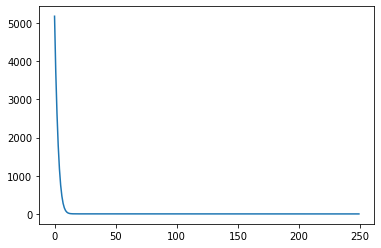

In [36]:
# View training history
plt.plot(history.history['loss'])

In [37]:
# Test model
model_test = model.predict(predictors.iloc[train_size:])

In [56]:
# Analyse model quality vs mean 
rmse = np.sqrt(np.mean((targets[train_size:].values - model_test)**2))
print('LinearRegression has RMSE of {0}'.format(rmse));

avg = np.mean(data['Z'][:train_size])

rmse = np.sqrt(np.mean((targets[train_size:].values - avg)**2))
print('Using the training data mean of {0} would have has resulted in a RMSE of {1}'.format(avg, rmse));

LinearRegression has RMSE of 40.22017478120073
Using the training data mean of -8.568125 would have has resulted in a RMSE of 28.452104737885826


In [55]:
dummy = pd.DataFrame(np.random.randint(100,200,size=(1, 4)), columns=list('ABCD'))
print(model.predict(dummy))
print((dummy.A * 0.5) + (dummy.B * 0.2) + (dummy.C * -0.87) + (dummy.D * -0.1) + 5)


[[-33.84829]]
0   -33.86
dtype: float64


The predicted value is perfect.
The evaluation indicates otherwise. There must be an error in the evaluation

In [83]:
a = targets.iloc[train_size:].values
b = model_test
print(a)
print(b)
print(a - b)

[-39.44  13.23 -32.23 -36.89  23.63 -19.7  -20.11 -56.29  21.83  -4.76
  -1.96 -10.05 -35.15 -49.66  37.93   1.07 -13.72  15.01 -20.97 -11.13
  12.99  56.06 -12.18  -4.61 -59.66 -32.84   8.58 -27.78  15.31 -54.64
 -11.68 -35.45 -43.21 -17.77  21.77  48.06 -16.45 -50.71 -29.87  -7.09
 -30.68  35.41 -15.11  40.91 -70.83  25.73 -43.04 -13.82  14.17 -33.38
  33.6  -26.07  46.72 -10.94 -18.91  39.4  -33.17 -20.8  -44.9  -13.35
  12.89 -48.02  14.79 -13.3   -4.6   10.76 -16.73  -9.89 -13.27 -30.84
  35.88  -6.74  20.65 -33.43  23.87  -6.94 -27.12 -58.99 -55.29 -67.86
  12.9  -62.1  -71.01 -44.67  -4.08 -65.1    6.89  23.61 -49.95 -26.3
 -15.77  20.71   0.44  -2.05 -48.81  -4.34 -63.21   0.55  12.63 -34.16
  38.78  23.38 -30.98  15.23 -44.92   0.41  -3.22  31.39   3.4  -69.1
  24.65   5.58 -42.04  11.31 -34.67 -71.82  34.03 -27.44  -7.36 -27.19
  -7.98   5.29 -28.01  -4.99 -22.13 -15.13   3.63 -12.34   2.91   3.54
  39.3    6.7   -8.13  12.76 -11.34  -4.29 -46.07  19.77  25.16  20.95
 -26.35 

model_test data is the wrong shape

In [75]:
def flat_list(nested_list):
  return [value for sublist in nested_list for value in sublist]
print(np.sqrt(np.mean((targets[train_size:].values - flat_list(model_test)) **2)))

0.0025908522175767017


In [76]:
# Analyse model quality vs mean 
rmse = np.sqrt(np.mean((targets[train_size:].values - flat_list(model_test))**2))
print('LinearRegression has RMSE of {0}'.format(rmse));

avg = np.mean(data['Z'][:train_size])

rmse = np.sqrt(np.mean((targets[train_size:].values - avg)**2))
print('Using the training data mean of {0} would have has resulted in a RMSE of {1}'.format(avg, rmse));

LinearRegression has RMSE of 0.0025908522175767017
Using the training data mean of -8.568125 would have has resulted in a RMSE of 28.452104737885826
